## Logistic Regression

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.special import expit

from scipy.optimize import minimize

from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline  

In [117]:
data = pd.read_csv("data/ex2data1.txt", header=None)

In [118]:
data.columns = ['test1', 'test2', 'decision']

In [8]:
data.describe()

test1       test2    decision
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000

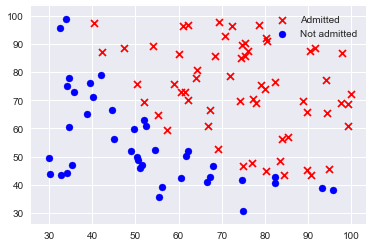

In [25]:
plt.scatter(data[data['decision'] == 1]['test1'], data[data['decision'] == 1]['test2'], marker='x', c='r')
plt.scatter(data[data['decision'] != 1]['test1'], data[data['decision'] != 1]['test2'], marker='o', c='b')
plt.legend(['Admitted', 'Not admitted'])
plt.show()

### Sigmoid function
<img src='img/logisticR.png' />

##### Cost function:
<img src='img/costfuncLogistic.png' />

In [258]:
def h(theta, X):
    return (1/(1+np.exp(-X.dot(theta)))) 


def cost_function(theta, features, y):
    """
    >>>cost_function([1,1,1], [[1,2],[2,3]], [1, 0])
    3.01
    
    """
    theta = np.array(theta)
    features = np.array(features)
    y = np.array(y)
        
    m = features.shape[0]
    X = np.c_[np.ones(m), features]
    
    theta = np.reshape(theta,(len(theta),1))
    
    hx = h(theta, X)
    J = (1./m) * (-np.transpose(y).dot(np.log(sigmoid(X.dot(theta)))) - np.transpose(1-y).dot(np.log(1-sigmoid(X.dot(theta)))))
    return J

#### Gradient Descent
<img src="img/gradientDescent.png">

This gradient looks identical to the linear regression gradient,
the formula is actually different because linear and logistic regression
have different definitions of hθ(x).

In [265]:
def next_thetas(theta, alpha, features, label):
    m = features.shape[0]
    X = np.c_[np.ones(m), features]

    return theta - alpha/m*((h(theta, X)-label).T).dot(X)

In [298]:
%%time
features = data[['test1','test2']]
label = data['decision']
i = 0
thetas = [0 ,0, 0] 
alpha = 1e-3
Js = []
Jb = 100
J = 10
while(i<1e4):
    thetas = next_thetas(thetas, alpha, features, label)
    Jb = J
    J = cost_function(thetas, features, label)
    Js.append(J)
    i += 1

Wall time: 7.98 s


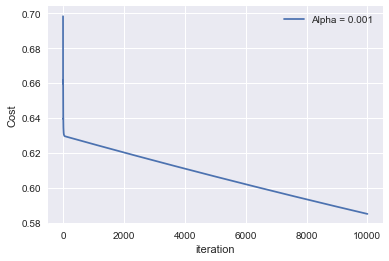

In [299]:
plt.plot(range(i), Js)
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.legend(["Alpha = "+ str(alpha)])
plt.show()

In [300]:
thetas

array([-0.66896603,  0.0150915 ,  0.00566237])

Too much iterations for this problem. A different approach is needed

The scipy.optimize package provides several commonly used optimization algorithms. 

In [289]:
%%time
res = minimize(cost_function, [0,0,0], args=(features,y), method='nelder-mead', options={'maxiter':400})
print(res.x, res.nit)

(array([-25.16130062,   0.20623142,   0.20147143]), 157)
Wall time: 147 ms


##### Decision Boundary

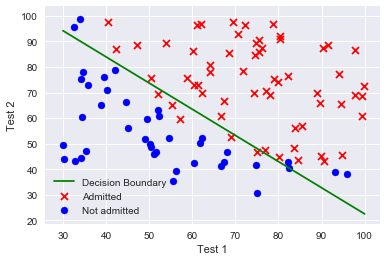

In [315]:
plt.scatter(data[data['decision'] == 1]['test1'], data[data['decision'] == 1]['test2'], marker='x', c='r')
plt.scatter(data[data['decision'] != 1]['test1'], data[data['decision'] != 1]['test2'], marker='o', c='b')
plt.plot([30,100], [-np.dot(res.x[:-1]/res.x[-1],[1,30]), -np.dot(res.x[:-1]/res.x[-1],[1,100])], c='g')

plt.legend(['Decision Boundary','Admitted', 'Not admitted'])
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.show()

## Regularized logistic regression